In [1]:
from corr_estymatory import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sn
import sqlite3

In [2]:
connection = sqlite3.connect("data/data/wea_nfz.db")
df = pd.read_sql("SELECT * FROM cva_cases "\
                                  "INNER JOIN lok_gmin ON " \
                                  "substr(cva_cases.teryt_code,1,7) = lok_gmin.teryt "\
                                  "INNER JOIN nn_stacje ON lok_gmin.rowid - 1 = nn_stacje.id_gmi "\
                                  "INNER JOIN stacje ON nn_stacje.id_st1 = stacje.id_st "\
                                  "INNER JOIN pog_dzienna ON stacje.kod_st = pog_dzienna.kod_st "\
                                  "AND cva_cases.adm_date = substr(pog_dzienna.pog_timestamp,1,10)"\
                                  "INNER JOIN pog_dzienna_mala ON stacje.kod_st = pog_dzienna_mala.kod_st "\
                                  "AND cva_cases.adm_date = substr(pog_dzienna_mala.pog_timestamp,1,10)"\
                                  "WHERE cva_cases.teryt_code LIKE '02%';"
                                    , con=connection)

In [3]:
df.drop('index', axis=1, inplace=True)
df = df.loc[:,~df.columns.duplicated()]
print(len(df.columns))
print(len(df.corr().columns))

116
57


In [4]:
corr = df.corr()
for i in df.columns:
    if i not in corr.columns:
        df.drop(i, axis=1, inplace=True)

In [5]:
print(len(df.columns))
print(len(df.corr().columns))

57
57


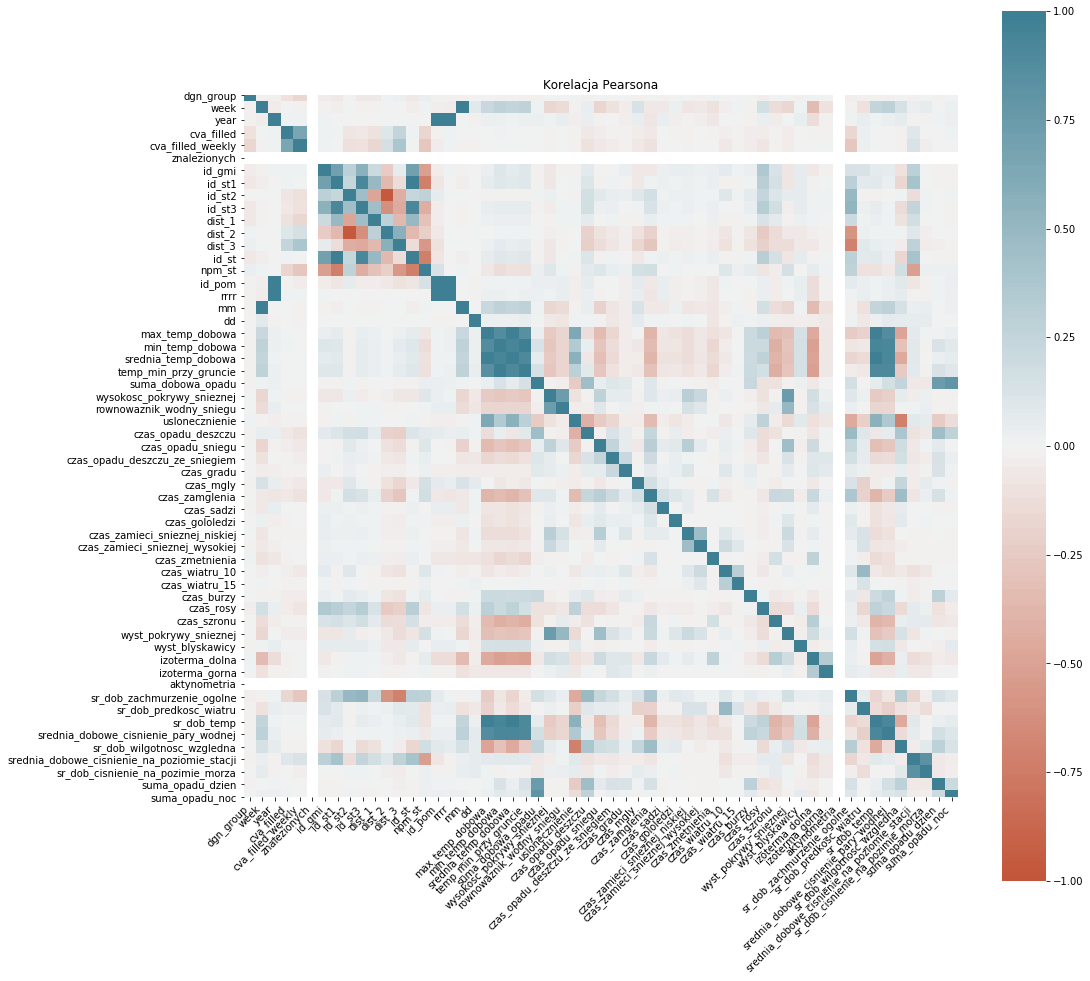

In [6]:
plt.figure(figsize=(16, 16))
# corrMatrix = df.corr()
# sn.heatmap(corrMatrix, annot=True)
# plt.matshow(df.corr())

corr = df.corr()
ax = sn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.title("Korelacja Pearsona")
plt.show()

In [7]:
df

,dgn_group,week,year,cva_filled,cva_filled_weekly,znalezionych,id_gmi,id_st1,id_st2,id_st3,...,aktynometria,sr_dob_zachmurzenie_ogolne,sr_dob_predkosc_wiatru,sr_dob_temp,srednia_dobowe_cisnienie_pary_wodnej,sr_dob_wilgotnosc_wzgledna,srednia_dobowe_cisnienie_na_poziomie_stacji,sr_dob_cisnienie_na_pozimie_morza,suma_opadu_dzien,suma_opadu_noc
0,2,1,2018,5.0,17.0,1,441,371,260,394,...,0,0.0,4.8,8.4,7.6,68.8,989.4,1004.5,0.0,0.0
1,1,1,2018,2.0,9.0,1,441,371,260,394,...,0,0.0,4.8,8.4,7.6,68.8,989.4,1004.5,0.0,0.0
2,1,1,2018,2.0,16.0,1,568,870,871,910,...,0,6.0,4.8,8.3,7.8,71.0,990.4,1005.1,0.0,0.0
3,1,1,2018,3.0,14.0,1,253,264,544,563,...,0,5.6,5.0,7.6,6.8,65.1,964.2,1005.4,0.0,0.0
4,1,1,2018,2.0,12.0,1,555,870,410,871,...,0,6.0,4.8,8.3,7.8,71.0,990.4,1005.1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,2,51,2019,1.0,3.0,1,568,870,871,910,...,0,7.5,1.5,0.5,4.7,73.5,1024.7,1040.3,0.0,0.0
9780,1,51,2019,1.0,7.0,1,253,264,544,563,...,0,6.0,1.6,-1.8,4.2,79.1,997.0,1041.0,0.0,0.0
9781,5,52,2019,1.0,1.0,1,441,371,260,394,...,0,0.0,2.0,3.8,5.5,70.8,1015.5,1031.3,0.0,0.0
9782,5,52,2019,1.0,1.0,1,568,870,871,910,...,0,4.8,5.6,5.5,5.7,63.9,1010.6,1025.8,0.0,0.0


In [8]:
cols = df.columns
print(len(df.columns))
corr_matrix = np.zeros((len(df.columns), len(df.columns)))
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        corr_matrix[i, j] = np.nan
        
        
df["znalezionych"].values
for i in range(len(df.columns)):
    print(i)
#    if isinstance(df[str(i)], int) or isinstance(df[str(i)], float):
#     print(df[i].values)
    for j in range(len(df.columns)):
        try:
            corr_matrix[i, j] = corr6(list(df[cols[i]].values), list(df[cols[j]].values))
        except:
            print(False)
            pass

57
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


In [9]:
corr_matrix[5, :] = np.nan
corr_matrix[: ,5] = np.nan
corr_matrix[47, :] = np.nan
corr_matrix[: ,47] = np.nan

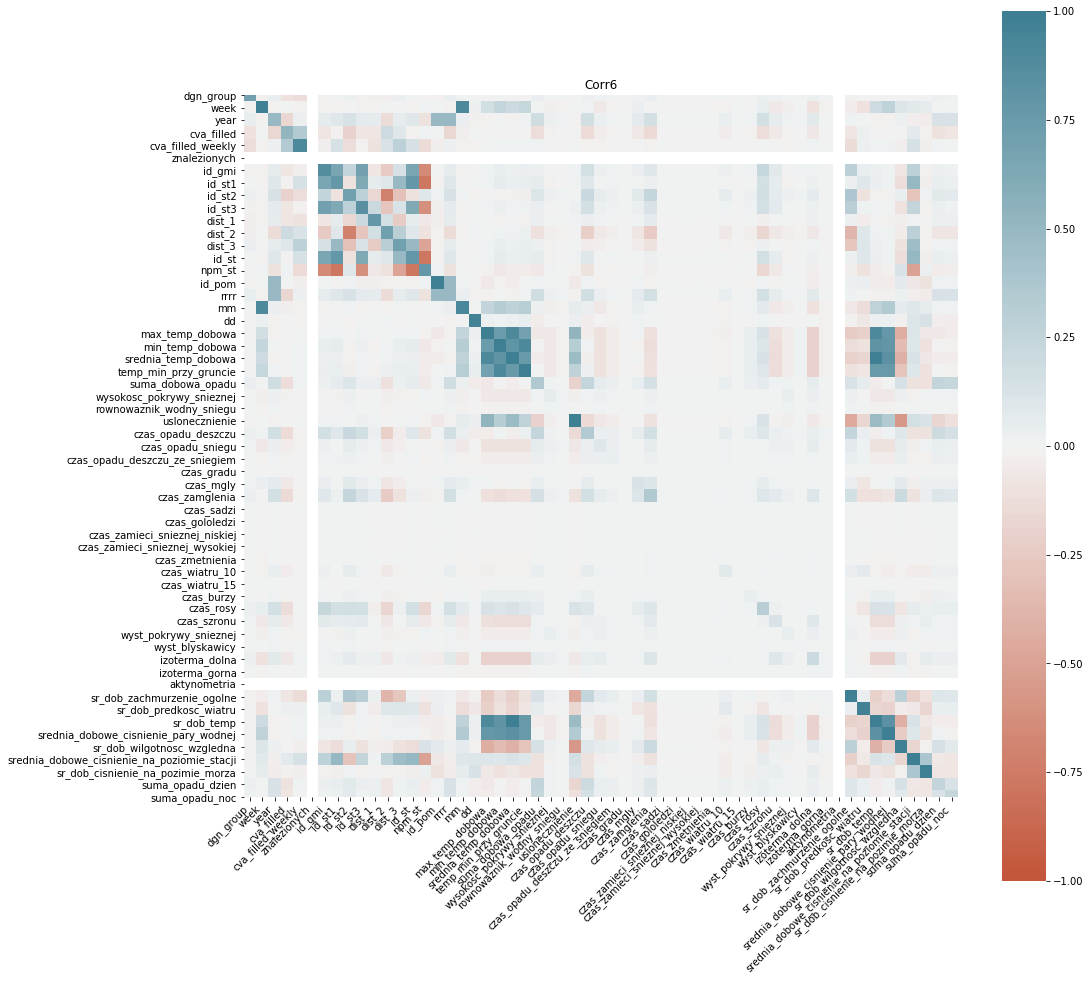

In [10]:
plt.figure(figsize=(16, 16))
# corrMatrix = df.corr()
# sn.heatmap(corrMatrix, annot=True)
# plt.matshow(df.corr())

ax = sn.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    df.columns,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    df.columns,
    horizontalalignment='right'
);

plt.title("Corr6")
plt.show()

In [11]:
cols = df.columns
print(len(df.columns))
corr_matrix = np.zeros((len(df.columns), len(df.columns)))
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        corr_matrix[i, j] = np.nan
        
        
df["znalezionych"].values
for i in range(len(df.columns)):
    print(i)
#    if isinstance(df[str(i)], int) or isinstance(df[str(i)], float):
#     print(df[i].values)
    for j in range(len(df.columns)):
        try:
            corr_matrix[i, j] = corr8(list(df[cols[i]].values), list(df[cols[j]].values))
        except:
            print(False)
            pass

57
0
1
2
3
4
5


D:\Polibuda\Matematyka Stosowana\semestr_6\matematyka_dla_przemyslu\seminarium\inz\analiza_danych_medycznych\corr_estymatory.py:89: RuntimeWarning: invalid value encountered in double_scalars
  return (np.var(Y + X) - np.var(Y - X)) / (np.var(Y + X) + np.var(Y - X))


6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


In [12]:
corr_matrix[5, :] = np.nan
corr_matrix[: ,5] = np.nan
corr_matrix[47, :] = np.nan
corr_matrix[: ,47] = np.nan

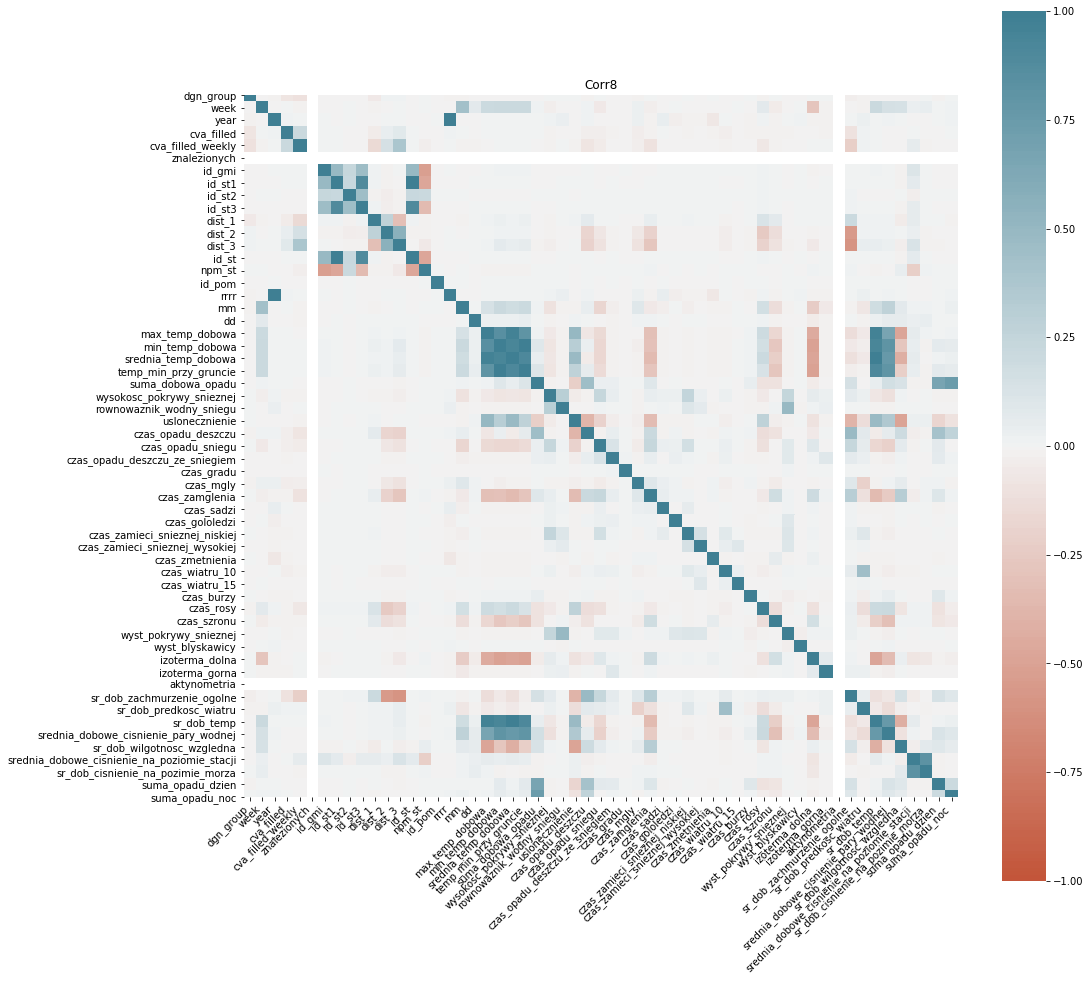

In [13]:
plt.figure(figsize=(16, 16))
# corrMatrix = df.corr()
# sn.heatmap(corrMatrix, annot=True)
# plt.matshow(df.corr())

ax = sn.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    df.columns,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    df.columns,
    horizontalalignment='right'
);

plt.title("Corr8")
plt.show()

In [ ]:
cols = df.columns
print(len(df.columns))
corr_matrix = np.zeros((len(df.columns), len(df.columns)))
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        corr_matrix[i, j] = np.nan
        
        
df["znalezionych"].values
for i in range(len(df.columns)):
    print(i)
#    if isinstance(df[str(i)], int) or isinstance(df[str(i)], float):
#     print(df[i].values)
    for j in range(len(df.columns)):
        try:
            corr_matrix[i, j] = cov2(list(df[cols[i]].values), list(df[cols[j]].values), 0.015)
        except:
            print(False)
            pass

57
0
False
False
False


In [ ]:
corr_matrix[5, :] = np.nan
corr_matrix[: ,5] = np.nan
corr_matrix[47, :] = np.nan
corr_matrix[: ,47] = np.nan

In [ ]:
plt.figure(figsize=(16, 16))
# corrMatrix = df.corr()
# sn.heatmap(corrMatrix, annot=True)
# plt.matshow(df.corr())

ax = sn.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    df.columns,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    df.columns,
    horizontalalignment='right'
);


plt.show()

In [ ]:
cols = df.columns
print(len(df.columns))
corr_matrix = np.zeros((len(df.columns), len(df.columns)))
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        corr_matrix[i, j] = np.nan
        
        
df["znalezionych"].values
for i in range(len(df.columns)):
    print(i)
#    if isinstance(df[str(i)], int) or isinstance(df[str(i)], float):
#     print(df[i].values)
    for j in range(len(df.columns)):
        try:
            corr_matrix[i, j] = corr3(list(df[cols[i]].values), list(df[cols[j]].values))
        except:
            print(False)
            pass

57
0


In [ ]:
corr_matrix[5, :] = np.nan
corr_matrix[: ,5] = np.nan
corr_matrix[47, :] = np.nan
corr_matrix[: ,47] = np.nan

In [ ]:
plt.figure(figsize=(16, 16))
# corrMatrix = df.corr()
# sn.heatmap(corrMatrix, annot=True)
# plt.matshow(df.corr())

ax = sn.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    df.columns,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    df.columns,
    horizontalalignment='right'
);


plt.show()

In [14]:
cols = df.columns
print(len(df.columns))
corr_matrix = np.zeros((len(df.columns), len(df.columns)))
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        corr_matrix[i, j] = np.nan
        
        
df["znalezionych"].values
for i in range(len(df.columns)):
    print(i)
#    if isinstance(df[str(i)], int) or isinstance(df[str(i)], float):
#     print(df[i].values)
    for j in range(len(df.columns)):
        try:
            corr_matrix[i, j] = corr5(np.array(list(df[cols[i]].values)), np.array(list(df[cols[j]].values)))
        except:
            print(False)
            pass

57
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


In [15]:
corr_matrix[5, :] = np.nan
corr_matrix[: ,5] = np.nan
corr_matrix[47, :] = np.nan
corr_matrix[: ,47] = np.nan

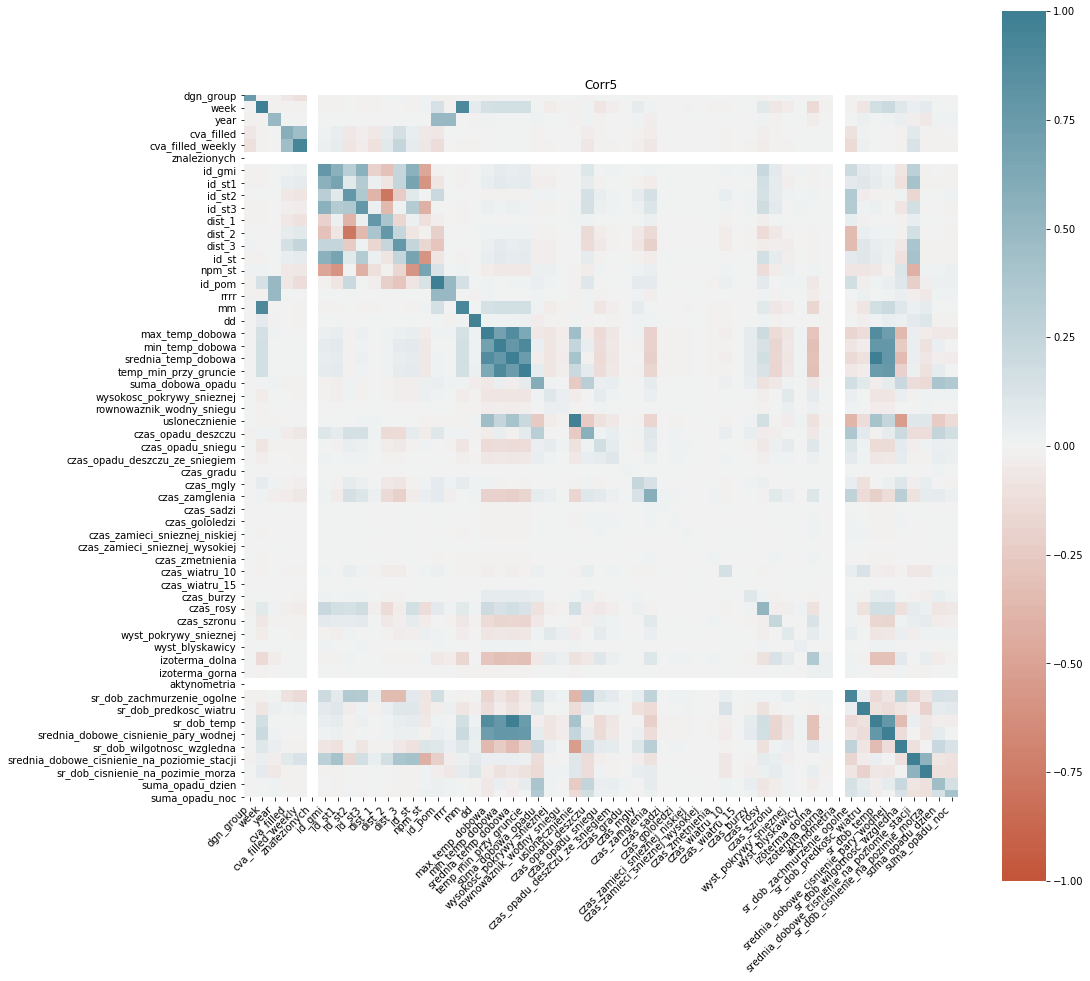

In [16]:
plt.figure(figsize=(16, 16))
# corrMatrix = df.corr()
# sn.heatmap(corrMatrix, annot=True)
# plt.matshow(df.corr())

ax = sn.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    df.columns,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    df.columns,
    horizontalalignment='right'
);


plt.title("Corr5")
plt.show()

In [25]:
cols = df.columns
print(len(df.columns))
corr_matrix = np.zeros((len(df.columns), len(df.columns)))
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        corr_matrix[i, j] = np.nan
        
        
df["znalezionych"].values
for i in range(len(df.columns)):
    print(i)
#    if isinstance(df[str(i)], int) or isinstance(df[str(i)], float):
#     print(df[i].values)
    for j in range(len(df.columns)):
        try:
            corr_matrix[i, j] = corr9(list(df[cols[i]].values), list(df[cols[j]].values))
        except:
            print(False)
            pass

57
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


In [26]:
corr_matrix[5, :] = np.nan
corr_matrix[: ,5] = np.nan
corr_matrix[47, :] = np.nan
corr_matrix[: ,47] = np.nan

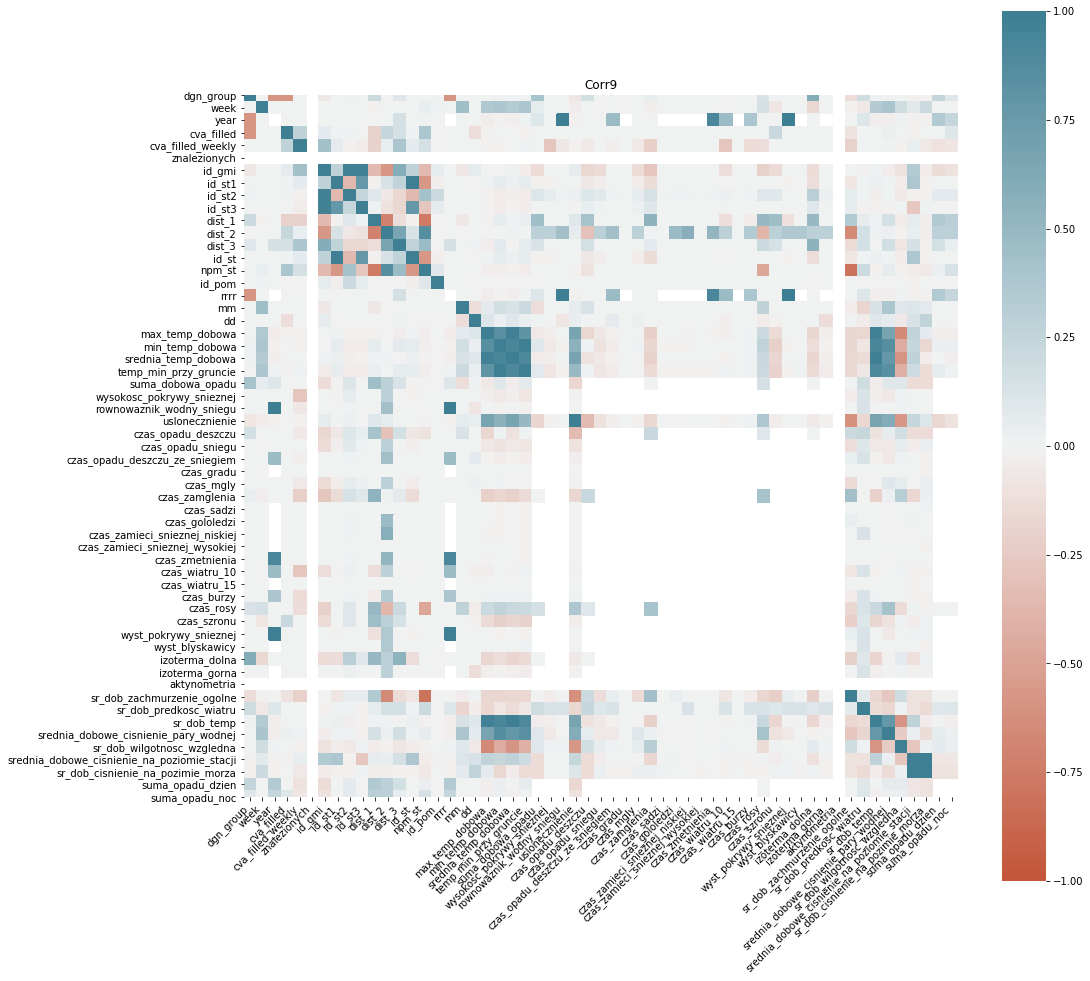

In [27]:
plt.figure(figsize=(16, 16))
# corrMatrix = df.corr()
# sn.heatmap(corrMatrix, annot=True)
# plt.matshow(df.corr())

ax = sn.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    df.columns,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    df.columns,
    horizontalalignment='right'
);

plt.title("Corr9")
plt.show()

In [20]:
cols = df.columns
print(len(df.columns))
corr_matrix = np.zeros((len(df.columns), len(df.columns)))
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        corr_matrix[i, j] = np.nan
        
        
df["znalezionych"].values
for i in range(len(df.columns)):
    print(i)
#    if isinstance(df[str(i)], int) or isinstance(df[str(i)], float):
#     print(df[i].values)
    for j in range(len(df.columns)):
        try:
            corr_matrix[i, j] = corr10(list(df[cols[i]].values), list(df[cols[j]].values))
        except:
            print(False)
            pass

57
0
1
2
3
4
5


D:\Polibuda\Matematyka Stosowana\semestr_6\matematyka_dla_przemyslu\seminarium\inz\analiza_danych_medycznych\corr_estymatory.py:109: RuntimeWarning: invalid value encountered in double_scalars
  return (IQR2(Y + X) - IQR2(Y - X)) / (IQR2(Y + X) + IQR2(Y - X))


6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


In [21]:
corr_matrix[5, :] = np.nan
corr_matrix[: ,5] = np.nan
corr_matrix[47, :] = np.nan
corr_matrix[: ,47] = np.nan

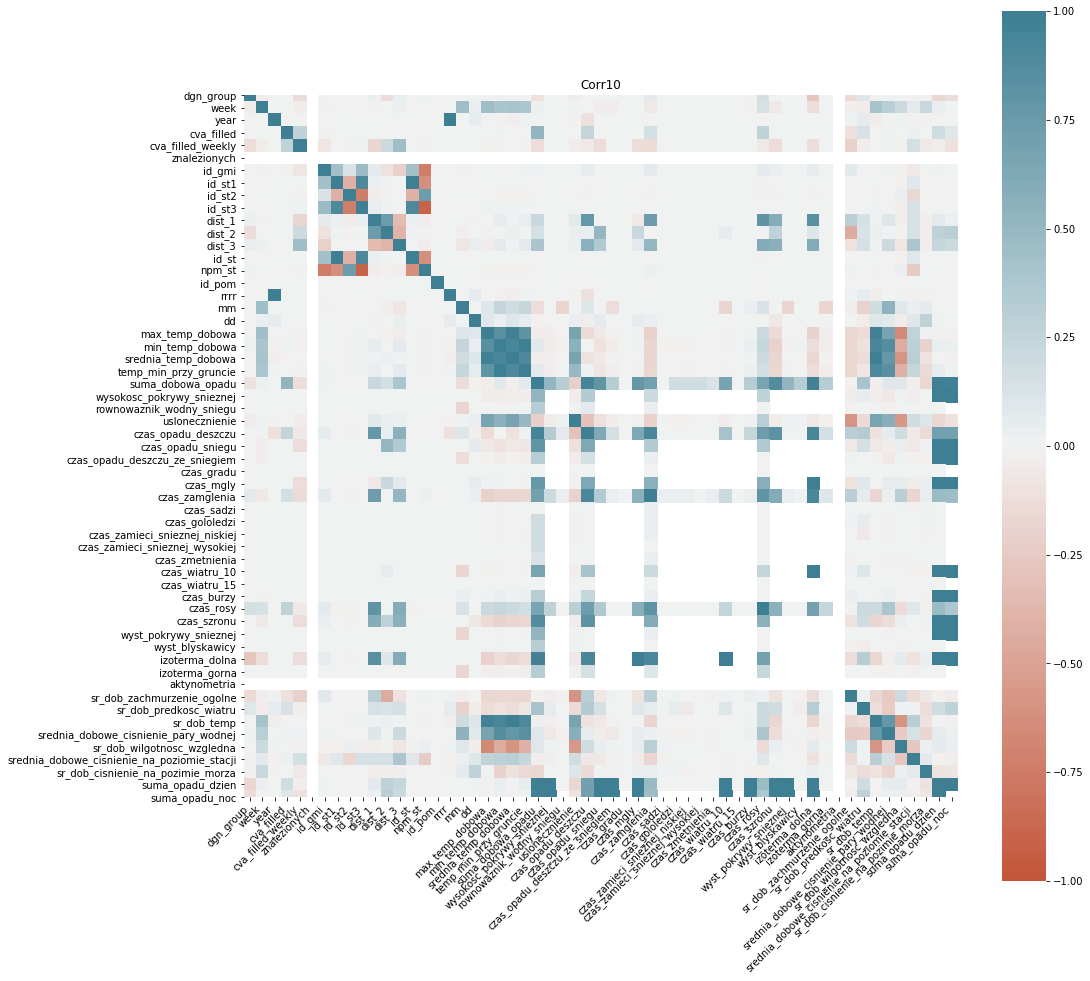

In [22]:
plt.figure(figsize=(16, 16))
# corrMatrix = df.corr()
# sn.heatmap(corrMatrix, annot=True)
# plt.matshow(df.corr())

ax = sn.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    df.columns,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    df.columns,
    horizontalalignment='right'
);

plt.title("Corr10")
plt.show()